# Neural Networks with TensorFlow

## Regression Problems
import numpy as np
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
* How `much/many`:
    * will my house sell for?
    * people will buy this app?
    * will my health insurance be?
    * should I save each week for fuel?
* Other types of problems where we can turn them into regression problems like:
    * How can I predict the co-ordinate of the points where the boxes should be for an object detection problem?

Estimating the relationship between a `dependent variables` (often called as the `outcome variable`) and one or more `independent variables` (often called as `predictors`, `covariates`, or `features`)

### What we're going to cover
* Architecture of a neural network regression model.
* Input shapes and output shapes of a regression model (features & labels)
* Creating custom data to view and fit
* Steps in modelling
    * Creating a model.
    * Compiling a model.
    * Fitting a model.
    * Evaluating a model.
* Different Evaluation methods.
* Saving & Loading models.

### Regression inputs and outputs
#### Inputs
Independent variables (features/co-variates/predictors):
* \# of bedrooms.
* \# of bathrooms.
* \# of garages.

[bedroom, bathroom, garage]
Shape = [3] (can be many more...)

#### Numerical encoding
[
[0, 0, 0, 1],
[0, 1, 0, 0],
[0, 1, 0, 0],
...
]

#### ML Algorithm
Often already exists, if not, we can build one.

#### Outputs
Predicted output (Offer price for the house).

Predicted outputs come from learning patterns and relationships between many examples of dependent an independent variables.

[9999999]
Shape = [1]

Usually the shape of the output(outcome) for a regression problem is 1.

### Anatomy of a Neural Network for a Regression problem
* Input layer
* Hidden layer(s)
* Neurons / hidden layer
* Output layer
* Hidden activation
* Output activation
* Loss Function
* Optimizer

### Let's write code

In [1]:
import tensorflow as tf

print(tf.__version__)

2.13.0


#### Let's Create data to view and fit

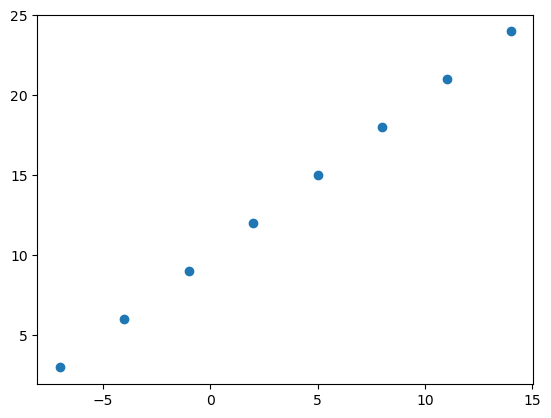

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#### Input & Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([999999])
house_info, house_price

2023-09-09 17:12:22.894376: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-09-09 17:12:22.894407: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-09-09 17:12:22.894413: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-09-09 17:12:22.895054: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-09 17:12:22.895695: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([999999], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

***Note:*** We are going to use one X value to predict one y value

Since the inputs and outputs are scalars we need to expand them while training like:
```
tf.expand_dims(X, axis=-1)
```

In [10]:
# Turn our numpy arrays to tensors
# X = tf.constant(X)
# y = tf.constant(y)
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
X_expanded = tf.expand_dims(X, axis=-1)
X_expanded

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

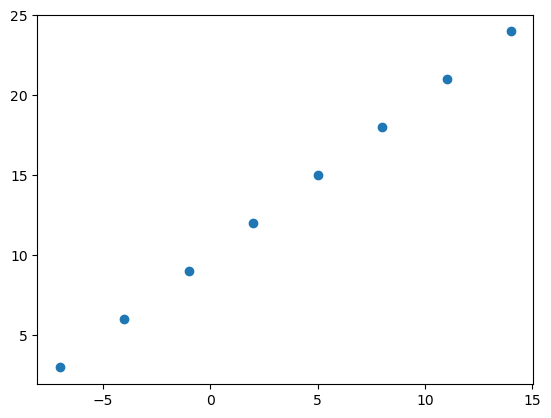

In [13]:
plt.scatter(X, y)

#### Steps in modelling with TensorFlow
1. ***Creating a model*** - define the i/p's and o/p's layers, as well as the hidden layers of the deep learning model.
2. ***Compiling the model*** - define the loss function (in other words, the function which tell our model how wrong is its prediction from the actual) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting the model - letting the model try to find patterns between X & y (features and labels).

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,  # Mean Absolute Error
              optimizer="SGD",  # Stochastic Gradient Decent
              metrics=["mae"])

# Fit the model
model.fit(X_expanded, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 248ms/step - loss: 8.2531 - mae: 8.2531
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 8.1206 - mae: 8.1206
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 7.9881 - mae: 7.9881
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 7.8556 - mae: 7.8556
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 7.7231 - mae: 7.7231


2023-09-09 17:12:23.419710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [15]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 45ms/step


2023-09-09 17:12:23.637651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[28.509912]], dtype=float32)

In [17]:
# Adding the loss. still it is off
y_pred + 16.1107

array([[44.620613]], dtype=float32)

#### Steps to improve model performance

We can improve our model by altering the steps we took to create a model.

1. Creating a model - we might add more layers increase the number of hidden units/neurons within each of the hidden layers, change the activation function of each layer.
2. Compiling the model - we can change the optimizers/loss functions or even change the ***learning rate*** of the optimizer.
3. Fitting the model - here we might fit a model for more epochs (leaving it training for longer trials) or on more data (give the model more examples to learn from)

In [18]:
tf.random.set_seed(42)
# Let's rebuild our model
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer="SGD",
              metrics=["mae"])

# Fit the model
model.fit(X_expanded, y, epochs=100)

Epoch 1/100


2023-09-09 17:12:23.790613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 138ms/step - loss: 17.9425 - mae: 17.9425
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 17.6612 - mae: 17.6612
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 17.3800 - mae: 17.3800
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 17.0987 - mae: 17.0987
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 16.8175 - mae: 16.8175
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 16.5362 - mae: 16.5362
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 16.2550 - mae: 16.2550
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 15.9737 - mae: 15.9737
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 15.6925 - mae: 15.6925
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 15.4112 - mae: 15.4112
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - lo

In [19]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
model.predict([17.])  # much closer reduced error by 3 off

1/1 [==============================] - 0s 31ms/step


2023-09-09 17:12:24.878570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[29.603796]], dtype=float32)

In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(X_expanded, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 390ms/step - loss: 14.0701 - mae: 14.0701
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1270 - mae: 13.1270
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.1863 - mae: 12.1863
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2427 - mae: 11.2427
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2907 - mae: 10.2907
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.3240 - mae: 9.3240
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.3361 - mae: 8.3361


2023-09-09 17:12:25.206244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3205 - mae: 7.3205
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.6909 - mae: 6.6909
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1061 - mae: 7.1061
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 7.6234 - mae: 7.6234
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8810 - mae: 7.8810
Epoch 13/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8138 - mae: 7.8138
Epoch 14/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5152 - mae: 7.5152
Epoch 15/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0509 - mae: 7.0509
Epoch 16/100
1/1 [==============================] - 0s 9ms/step - loss: 6.6337 - mae: 6.6337
Epoch 17/100
1/1 [==============================] - 0s 10ms/step - loss: 6.2612 - mae: 6.2612
Epoch 18/100
1/1 [==============================] - 0s 10ms/step - loss

In [22]:
model.predict([17.])

1/1 [==============================] - 0s 41ms/step


2023-09-09 17:12:26.430400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[27.78655]], dtype=float32)

#### Evaluating a model
3 words:
> "Visualize, visualize, visualize"

* The Data - what data are we working eith? What does it look like?
* The model itself - how does it look like.
* The training of the model
* The prediction of the model

In [23]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

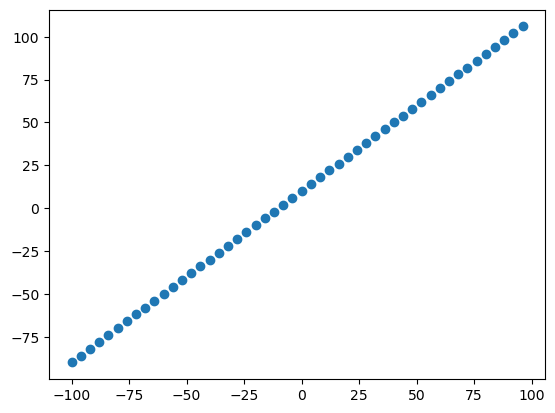

In [25]:
# Visualize the data
plt.scatter(X, y)

#### The 3 sets...
* ***Training set*** - the model learns from this dataset, typically 70% - 80% of the global data available.
* ***Validation set*** - the model gets tuned on this data, which is typically 10% -15% of the total dataset available.
* ***Test set*** - the model gets evaluated on this data to test what it has learnt, this set is typically 10 - 15% of the total dataset available.

In [26]:
len(X)

50

In [27]:
# We will skip validation set for now as we have a small dataset

# Training set
X_train, y_train = X[:40], y[:40]

# Test set
X_test, y_test = X[40:], y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#### Visualize the train and test sets

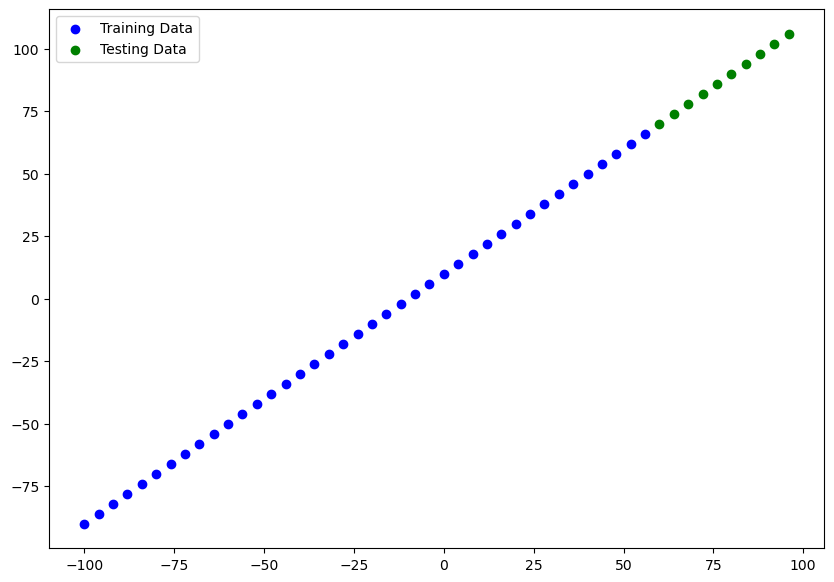

In [28]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot testing data in blue
plt.scatter(X_test, y_test, c="g", label="Testing Data")

# Show the legend
plt.legend();

In [147]:
tf.random.set_seed(42)
# Create a model neural network
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),  # Dense means fully connected neuron layers
    tf.keras.layers.Dense(1, name="output_layer")  # Dense means fully connected neuron layers
], name="line_predictor")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['mae'])

In [148]:
# model.build()

* ***Total params*** - total number of parameters in the model. Used to find the relationship between dependent and independent variables.
* ***Trainable params*** - these are the parameters (patterns) the model can update as it trains.
* ***Non-trainable params*** -  these parameters aren't updated during training (this is typical when you bring in an already learn patterns or parameters from other model during ***transfer learning***).

📖 **Resource**: [MIT's Introduction to Deep Learning Video](https://www.youtube.com/watch?v=QDX-1M5Nj7s&t=4s)

In [149]:
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

2023-09-09 17:45:18.639523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [150]:
model.summary()

Model: "line_predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


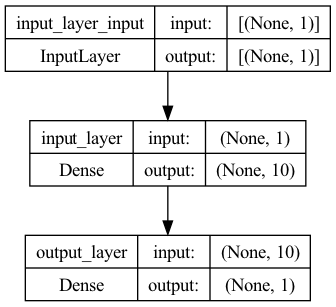

In [151]:
tf.keras.utils.plot_model(model, show_shapes=True)

#### Visualizing our model's predictions

To visualize predictions, it's good practice to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth vs your model's prediction)

In [152]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 33ms/step


2023-09-09 17:45:20.777407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ 70.39953 ],
       [ 74.97765 ],
       [ 79.55578 ],
       [ 84.13391 ],
       [ 88.71203 ],
       [ 93.29015 ],
       [ 97.86827 ],
       [102.44641 ],
       [107.02452 ],
       [111.602646]], dtype=float32)

In [153]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 ***Note***: If you feel like you're going to reuse some kind of functionality in the future it's a good idea to put them in a function

In [154]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    
    :param train_data: 
    :param train_labels: 
    :param test_data: 
    :param test_labels: 
    :param predictions: 
    :return: 
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot model's testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")

    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    # Show legend
    plt.legend()

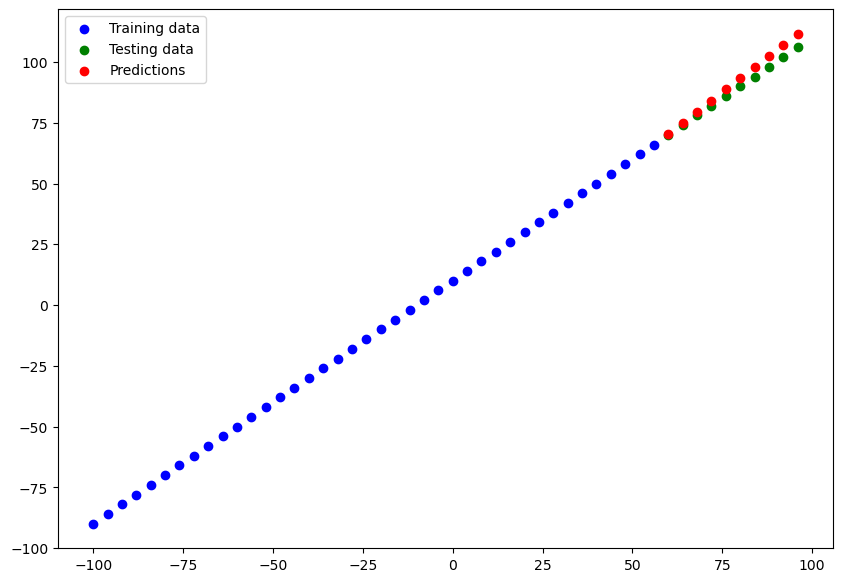

In [176]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

#### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, teo of the main metrics:
* MAE - Mean Absolute Error, "on average, how wrong is each of my model's predictions".
* MSE - Mean Square Error, "square the average errors".

In [156]:
# Evaluate the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 880ms/step - loss: 3.0011 - mae: 3.0011


2023-09-09 17:54:08.066641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[3.0010902881622314, 3.0010902881622314]

In [157]:
y_pred

array([[ 70.39953 ],
       [ 74.97765 ],
       [ 79.55578 ],
       [ 84.13391 ],
       [ 88.71203 ],
       [ 93.29015 ],
       [ 97.86827 ],
       [102.44641 ],
       [107.02452 ],
       [111.602646]], dtype=float32)

In [158]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [164]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.39953 ,  74.97765 ,  79.55578 ,  84.13391 ,  88.71203 ,
        93.29015 ,  97.86827 , 102.44641 , 107.02452 , 111.602646],
      dtype=float32)>

In [165]:
# Calculate the MAE
mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.0010903>

In [166]:
# Calculate the MSE
mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.76392>

In [182]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_predictions):
    return tf.metrics.MAE(y_true, tf.squeeze(y_predictions))


def mse(y_true, y_predictions):
    return tf.metrics.MSE(y_true, tf.squeeze(y_predictions))

#### Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> ...
```

1. Get more data - get more ex.'s for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers ir more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the dataset.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
4. 

In [169]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

##### Build `model1`

In [173]:
X_train_expanded = tf.expand_dims(X_train, axis=-1)
X_train_expanded

<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56]], dtype=int32)>

In [174]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name="line_predictor__model_1")

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mae,
                metrics=["mae"])

# Fit the model
model_1.fit(X_train_expanded, y_train, epochs=100)

Epoch 1/100


2023-09-09 18:28:05.573769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 121ms/step - loss: 9.1395 - mae: 9.1395
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5704 - mae: 8.5704
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 13.8355 - mae: 13.8355
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5665 - mae: 7.5665
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 11.9961 - mae: 11.9961
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2791 - mae: 9.2791
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.4433 - mae: 8.4433
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0286 - mae: 9.0286
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.4429 - mae: 18.4429
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9389 - mae: 9.9389
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 8.3267 - m

In [179]:
# Make and plot predictions with our `model_1`
y_pred_1 = model_1.predict(X_test)
y_pred_1

2023-09-11 01:09:20.995570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 705ms/step


array([[44.44665 ],
       [47.322304],
       [50.197956],
       [53.07361 ],
       [55.94926 ],
       [58.824913],
       [61.70056 ],
       [64.57622 ],
       [67.451866],
       [70.327515]], dtype=float32)

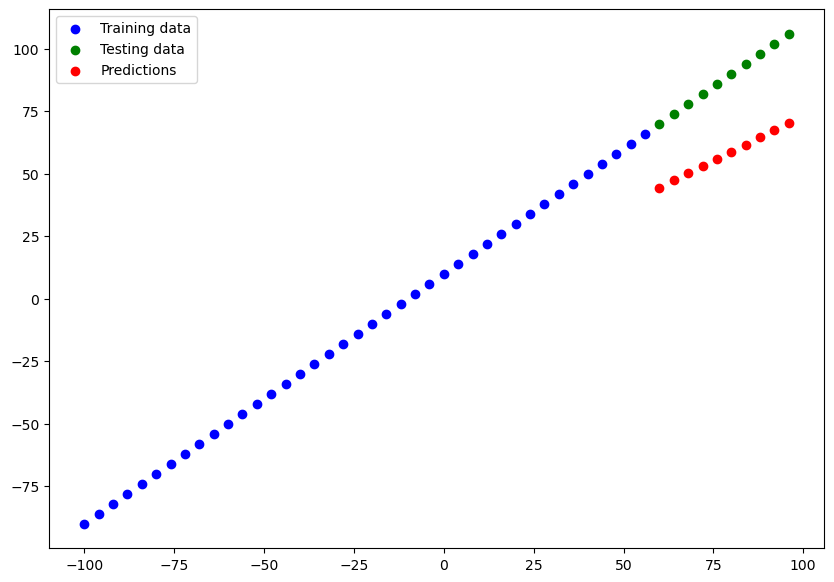

In [180]:
# Plot predictions
plot_predictions(predictions=y_pred_1)

In [183]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.612915>,
 <tf.Tensor: shape=(), dtype=float32, numpy=947.5799>)

** Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [195]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])
model_2.compile(optimizer="SGD",
                loss=tf.keras.losses.mae,
                metrics=["mae"])
model_2.fit(X_train_expanded, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 71ms/step - loss: 30.7644 - mae: 30.7644
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 26.4861 - mae: 26.4861
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 31.7218 - mae: 31.7218
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 28.3730 - mae: 28.3730

2023-09-11 01:20:34.367816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 10ms/step - loss: 27.2367 - mae: 27.2367
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.8707 - mae: 14.8707
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8317 - mae: 11.8317
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1623 - mae: 11.1623
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0906 - mae: 11.0906
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.3807 - mae: 40.3807
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.7847 - mae: 27.7847
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2505 - mae: 10.2505
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 25.3167 - mae: 25.3167
Epoch 13/100
2/2 [==============================] - 0s 7ms/step - loss: 16.9511 - mae: 16.9511
Epoch 14/100
2/2 [==============================] - 0s 8ms/step - l

1/1 [==============================] - 0s 45ms/step


2023-09-11 01:20:36.274127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


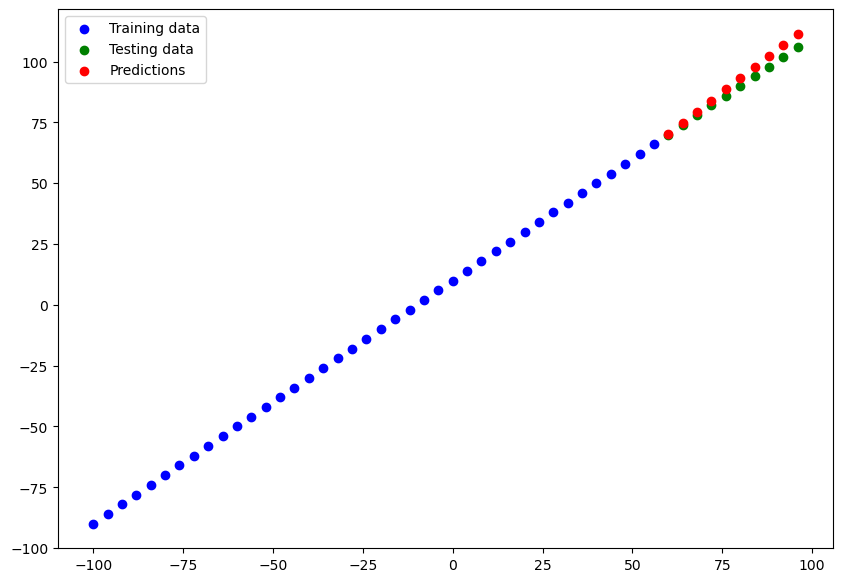

In [196]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [197]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.8866181>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.042463>)

In [198]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer="SGD",
                metrics=["mae"])
model_3.fit(X_train_expanded, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 31ms/step - loss: 39.8632 - mae: 39.8632
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 27.9193 - mae: 27.9193
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 33.5991 - mae: 33.5991
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 24.8685 - mae: 24.8685
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 14.7317 - mae: 14.7317
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 11.8886 - mae: 11.8886

2023-09-11 01:23:00.651042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 9ms/step - loss: 11.7301 - mae: 11.7301
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 11.0760 - mae: 11.0760
Epoch 8/500
2/2 [==============================] - 0s 21ms/step - loss: 11.0614 - mae: 11.0614
Epoch 9/500
2/2 [==============================] - 0s 15ms/step - loss: 40.0835 - mae: 40.0835
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 27.5274 - mae: 27.5274
Epoch 11/500
2/2 [==============================] - 0s 9ms/step - loss: 10.2446 - mae: 10.2446
Epoch 12/500
2/2 [==============================] - 0s 8ms/step - loss: 25.3965 - mae: 25.3965
Epoch 13/500
2/2 [==============================] - 0s 11ms/step - loss: 16.8330 - mae: 16.8330
Epoch 14/500
2/2 [==============================] - 0s 8ms/step - loss: 25.6404 - mae: 25.6404
Epoch 15/500
2/2 [==============================] - 0s 7ms/step - loss: 17.5184 - mae: 17.5184
Epoch 16/500
2/2 [==============================] - 0s 9ms/ste

1/1 [==============================] - 0s 41ms/step


2023-09-11 01:23:58.084055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


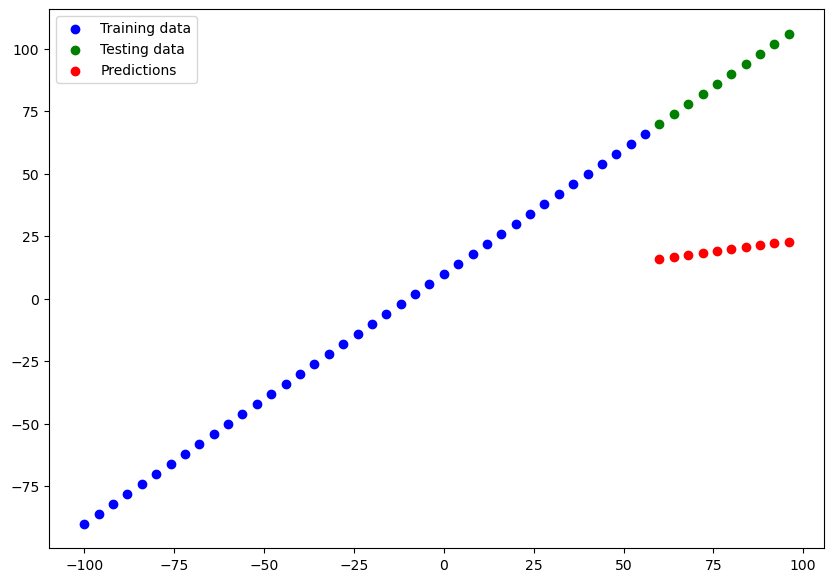

In [199]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [200]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.54983>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4785.217>)

***Note:*** We need to start with small experiments (small models) then we scale it up.

#### Comparing the results of our experiments

- Let's compare the results of all the models experiments

In [201]:
# Let's compare our models results using the pandas dataframe
import pandas as pd

model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()],
]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.612915,947.579895
1,model_2,2.886618,11.042463
2,model_3,68.549828,4785.216797


Looks like `model_2` performed the best

In [203]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 25)                50        
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ***Note:*** One of the main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.

### Tracking you experiments

One perfect habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

### Saving our models

Saving our models allows us to use them outside our notebook say in a website or a mobile application.

There are 2 formats that we can save our model to:
1. The SavedModel format.
2. The HDF5 format.

In [204]:
# Saving in SavedModel format
model_2.save('best_line_predictor_SavedModel_format')

INFO:tensorflow:Assets written to: best_line_predictor_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_line_predictor_SavedModel_format/assets


In [206]:
# Saving model in HDF5 format
model_2.save("best_line_predictor.h5")

/Users/jeevavighnesh/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading the model to test the saved model

In [207]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_line_predictor_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 25)                50        
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [208]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 25)                50        
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [209]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_preds

1/1 [==============================] - 0s 43ms/step


2023-09-11 01:54:06.100218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-11 01:54:06.263952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [210]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [211]:
# Loading the model from the h5 format
loaded_h5_format = tf.keras.models.load_model("best_line_predictor.h5")
loaded_h5_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 25)                50        
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [212]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 25)                50        
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [213]:
loaded_h5_preds = loaded_h5_format.predict(X_test)
model_2_preds = model_2.predict(X_test)
model_2_preds == loaded_h5_preds

1/1 [==============================] - 0s 23ms/step


2023-09-11 01:59:45.985393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger real world example

## [Medical Cost dataset from kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)

We can directly import the dataset from this raw github link pinting to the csv [insurance.csv](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv)

In [342]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [343]:
RANDOM_STATE = 42

In [344]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [345]:
insurance_one_hot = pd.get_dummies(insurance).astype('float32')
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900000,0.0,16884.923828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770000,1.0,1725.552246,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000000,3.0,4449.461914,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705000,0.0,21984.470703,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.879999,0.0,3866.855225,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.969999,3.0,10600.547852,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920000,0.0,2205.980713,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.849998,0.0,1629.833496,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.799999,0.0,2007.944946,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [346]:
# Create X & y values (features & labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head(), y.head()

(    age        bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0  19.0  27.900000       0.0         1.0       0.0        0.0         1.0   
 1  18.0  33.770000       1.0         0.0       1.0        1.0         0.0   
 2  28.0  33.000000       3.0         0.0       1.0        1.0         0.0   
 3  33.0  22.705000       0.0         0.0       1.0        1.0         0.0   
 4  32.0  28.879999       0.0         0.0       1.0        1.0         0.0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0               0.0               0.0               0.0               1.0  
 1               0.0               0.0               1.0               0.0  
 2               0.0               0.0               1.0               0.0  
 3               0.0               1.0               0.0               0.0  
 4               0.0               1.0               0.0               0.0  ,
 0    16884.923828
 1     1725.552246
 2     4449.461914
 3    2198

In [347]:
# Create training and test sets
# 80% training 20% testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [348]:
insurance_one_hot.dtypes

age                 float32
bmi                 float32
children            float32
charges             float32
sex_female          float32
sex_male            float32
smoker_no           float32
smoker_yes          float32
region_northeast    float32
region_northwest    float32
region_southeast    float32
region_southwest    float32
dtype: object

In [349]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 25)                50        
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [350]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(RANDOM_STATE)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
 1/34 [..............................] - ETA: 13s - loss: 13158.1094 - mae: 13158.1094

2023-09-11 04:00:50.114701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 8ms/step - loss: 8545.6533 - mae: 8545.6533
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7854.0991 - mae: 7854.0991
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7564.3091 - mae: 7564.3091
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7678.8799 - mae: 7678.8799
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7653.3682 - mae: 7653.3682
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7661.4839 - mae: 7661.4839
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7529.0410 - mae: 7529.0410
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7691.6450 - mae: 7691.6450
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7490.1646 - mae: 7490.1646
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7714.2920 - mae: 7714.2920
Epoch 11/10

In [358]:
# Check the results of the insurance model on the test data
insurance_model_1_loss = insurance_model.evaluate(X_test, y_test)
insurance_model_1_loss

9/9 [==============================] - 0s 6ms/step - loss: 7932.8872 - mae: 7932.8872


2023-09-11 04:02:12.677612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[7932.88720703125, 7932.88720703125]

In [352]:
y_train.median(), y_train.mean()

(9575.442, 13346.09)

Right now it looks like our model isn't performing well... let's try to improve it

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units.
2. ATrain for longer.
3. 

In [353]:
tf.random.set_seed(RANDOM_STATE)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  # loss is going nan
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

2023-09-11 04:01:13.522302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [354]:
insurance_model_2_loss = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss

5/9 [===============>..............] - ETA: 0s - loss: 5125.6240 - mae: 5125.6240

2023-09-11 04:01:31.978573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 21ms/step - loss: 4946.6616 - mae: 4946.6616


[4946.66162109375, 4946.66162109375]

Text(0, 0.5, 'loss')

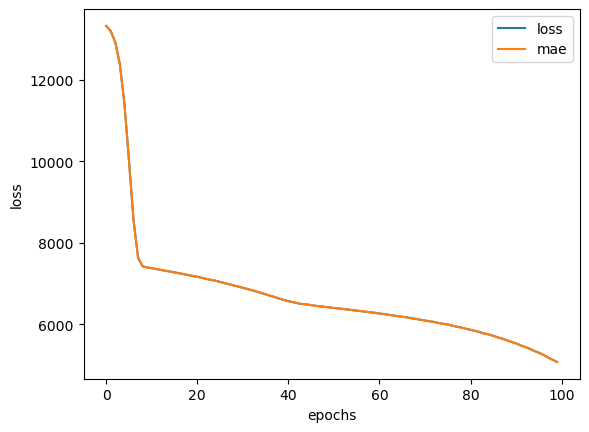

In [355]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [356]:
tf.random.set_seed(RANDOM_STATE)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
 8/34 [======>.......................] - ETA: 0s - loss: 13525.5332 - mae: 13525.5332

2023-09-11 04:01:32.709463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 8ms/step - loss: 13296.9297 - mae: 13296.9297
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 13133.7910 - mae: 13133.7910
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 12788.4893 - mae: 12788.4893
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 12103.7539 - mae: 12103.7539
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 10961.0498 - mae: 10961.0498
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 9509.9512 - mae: 9509.9512
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 8176.7515 - mae: 8176.7515
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 7527.8174 - mae: 7527.8174
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 7418.5249 - mae: 7418.5249
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 7397.5586 - mae: 7397.5586
E

In [357]:
len(history.history['loss'])

200

In [359]:
insurance_model_3_loss = insurance_model_3.evaluate(X_test, y_test)
insurance_model_3_loss

9/9 [==============================] - 0s 7ms/step - loss: 3493.0198 - mae: 3493.0198


2023-09-11 04:02:23.950834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[3493.019775390625, 3493.019775390625]

Text(0, 0.5, 'loss')

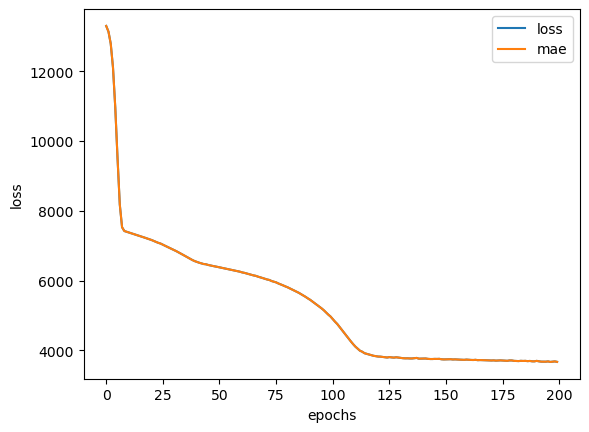

In [360]:
# Plot history also known as loss curve or a training curve
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

> 🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked the same question before... so TensorFlow has a solution! It's called the [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component that you can add to your model once it's stops improving a certain metric significantly.

In [361]:
tf.random.set_seed(RANDOM_STATE)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
insurance_model_3_early_stop = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3_early_stop.compile(loss=tf.keras.losses.mae,
                                     optimizer=tf.keras.optimizers.Adam(),
                                     metrics=['mae'])
history = insurance_model_3_early_stop.fit(X_train, y_train, epochs=500, callbacks=callback)

Epoch 1/500
 1/34 [..............................] - ETA: 12s - loss: 13165.7383 - mae: 13165.7383

2023-09-11 04:02:28.018045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 10ms/step - loss: 13283.3906 - mae: 13283.3906
Epoch 2/500
34/34 [==============================] - 0s 7ms/step - loss: 13073.6211 - mae: 13073.6211
Epoch 3/500
34/34 [==============================] - 0s 7ms/step - loss: 12646.3018 - mae: 12646.3018
Epoch 4/500
34/34 [==============================] - 0s 9ms/step - loss: 11828.9756 - mae: 11828.9756
Epoch 5/500
34/34 [==============================] - 0s 7ms/step - loss: 10542.7988 - mae: 10542.7988
Epoch 6/500
34/34 [==============================] - 0s 7ms/step - loss: 9050.6279 - mae: 9050.6279
Epoch 7/500
34/34 [==============================] - 0s 6ms/step - loss: 7875.1572 - mae: 7875.1572
Epoch 8/500
34/34 [==============================] - 0s 7ms/step - loss: 7484.1079 - mae: 7484.1079
Epoch 9/500
34/34 [==============================] - 0s 7ms/step - loss: 7431.6211 - mae: 7431.6211
Epoch 10/500
34/34 [==============================] - 0s 6ms/step - loss: 7411.6011 - mae: 7411.6011


In [362]:
len(history.history['loss'])

340

In [363]:
insurance_model_3_early_stop.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 3172.0183 - mae: 3172.0183


2023-09-11 04:03:38.559034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[3172.018310546875, 3172.018310546875]

Text(0, 0.5, 'loss')

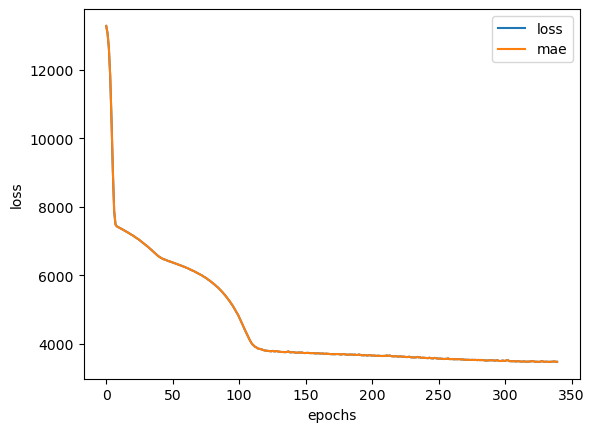

In [364]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

### Preprocessing data (normalization and standardization)

In [365]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.879999,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.969999,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.849998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.799999,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: ylabel='Frequency'>

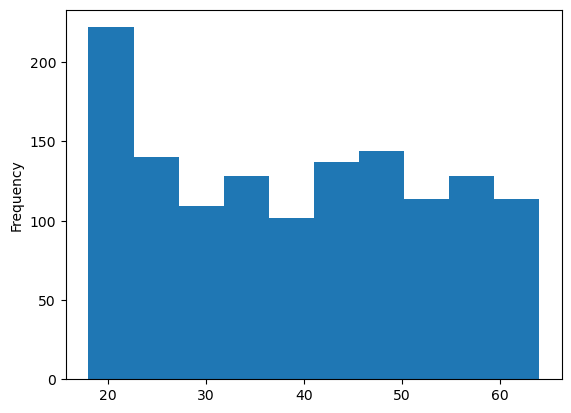

In [366]:
X['age'].plot(kind="hist")

<Axes: ylabel='Frequency'>

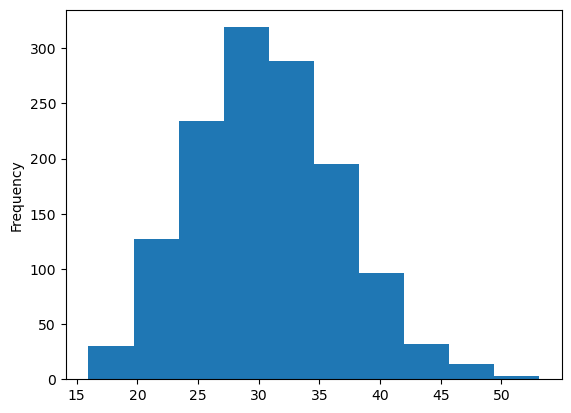

In [367]:
X['bmi'].plot(kind="hist")

<Axes: ylabel='Frequency'>

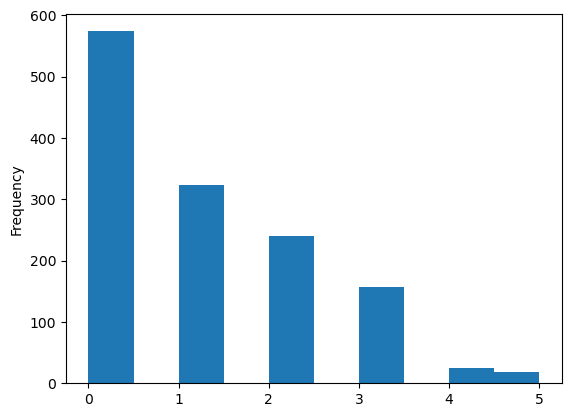

In [368]:
X['children'].plot(kind='hist')

**Note:** The functions referred below are Scikit-Learn Functions

***Scale (also referred to as normalization):***
- Converts all values to be between 0 and 1 whilst preserving the original distribution.
- `MinMaxScaler`
- Used as default scaler with neural networks.

***Standardization:***
- Removes the mean and divides each value by the standard deviation
- `StandardScaler`
- Transform a feature to have close to normal distribution (caution: this reduces the effect of outliers).

If in doubt check and see which performs better.

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [370]:
columns_to_normalize = ["age", "bmi", "children"] # to turn all these columns inbetween 0 & 1
columns_to_one_hot_encode = [x for x in insurance.columns.tolist() if x not in columns_to_normalize]
columns_to_one_hot_encode.remove("charges")
columns_to_one_hot_encode

['sex', 'smoker', 'region']

In [371]:
ct = make_column_transformer(
    (MinMaxScaler(), columns_to_normalize),
    (OneHotEncoder(handle_unknown="ignore"), columns_to_one_hot_encode)
)

X = insurance.drop("charges", axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [372]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [373]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [374]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast
575,58,female,27.170,0,no,northwest
535,38,male,28.025,1,no,northeast
543,54,female,47.410,0,yes,southeast


In [375]:
X_test_normal

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [376]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

> Our Data is normalized and one hot encoded. Now we train and fit it in our NN.

In [391]:
tf.random.set_seed(RANDOM_STATE)
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
history = insurance_model_4.fit(X_train_normal, y_train, epochs=500, callbacks=callback)

Epoch 1/500
 1/34 [..............................] - ETA: 12s - loss: 13158.6113 - mae: 13158.6113

2023-09-11 04:09:53.031339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 10ms/step - loss: 13342.9785 - mae: 13342.9785
Epoch 2/500
34/34 [==============================] - 0s 7ms/step - loss: 13332.3965 - mae: 13332.3965
Epoch 3/500
34/34 [==============================] - 0s 7ms/step - loss: 13306.9229 - mae: 13306.9229
Epoch 4/500
34/34 [==============================] - 0s 9ms/step - loss: 13255.7910 - mae: 13255.7910
Epoch 5/500
34/34 [==============================] - 0s 6ms/step - loss: 13167.8340 - mae: 13167.8340
Epoch 6/500
34/34 [==============================] - 0s 6ms/step - loss: 13032.0049 - mae: 13032.0049
Epoch 7/500
34/34 [==============================] - 0s 6ms/step - loss: 12838.3848 - mae: 12838.3848
Epoch 8/500
34/34 [==============================] - 0s 7ms/step - loss: 12577.1445 - mae: 12577.1445
Epoch 9/500
34/34 [==============================] - 0s 7ms/step - loss: 12238.2266 - mae: 12238.2266
Epoch 10/500
34/34 [==============================] - 0s 6ms/step - loss: 11820.4316 - mae: 1

In [392]:
insurance_model_4_loss = insurance_model_4.evaluate(X_test_normal, y_test)
insurance_model_4_loss

9/9 [==============================] - 0s 7ms/step - loss: 3161.2595 - mae: 3161.2595


2023-09-11 04:10:42.906047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[3161.259521484375, 3161.259521484375]

In [393]:
np.array(insurance_model_4_loss) - np.array(insurance_model_2_loss)

array([-1785.40209961, -1785.40209961])

Text(0, 0.5, 'loss')

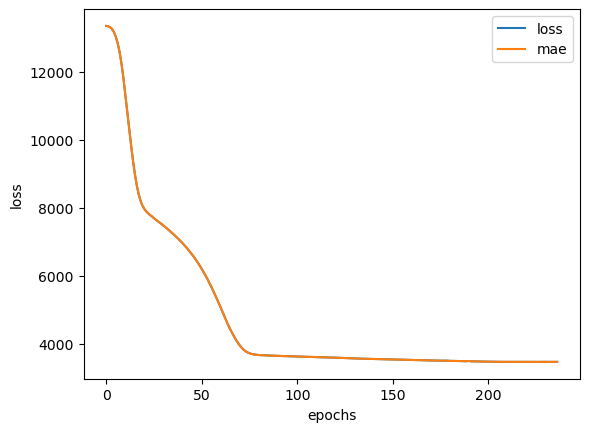

In [394]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')